# Content-Based Recommender System

## Importing Necessary Libraries

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

## Importing Dataset

In [2]:
# importing the datset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/anime-recommender/dataset/anime.csv')
rating_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/anime-recommender/dataset/rating.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## Removing Unnecessary Columns

In [4]:
# Dropping the unnecessary columns
df.drop(['type','episodes','members','rating'],axis=1,inplace=True)
print(df.shape)
df.head()

(12294, 3)


,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


## Dealing with Missing Values

anime_id     0
name         0
genre       62
dtype: int64


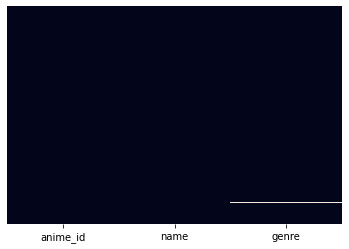

In [5]:
# missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=0)
print(df.isnull().sum())
plt.show()

In [6]:
# dropping null values
df.dropna(inplace=True)
print(df.shape)
df.head()

(12232, 3)


,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


## Data Pre-Processing

In [7]:
# removing commas
def remove_comma(text):
    return ' '.join(text.split(', '))

# connecting multiwords
def multi_words(text):
    if "Slice of Life" in text:
        text = text.split('Slice of Life')
        text.append('SliceofLife')
        text = ' '.join(text)
    if "Sci-Fi" in text:
        text = text.split('Sci-Fi')
        text.append('SciFi')
        text = ' '.join(text)
    return text

df['genre'] = df['genre'].apply(remove_comma)
df['genre'] = df['genre'].apply(multi_words)

## Recommending to a Randomly Selected User

In [8]:
# anime that user_5 likes
user_id = 5
rating_df[(rating_df['user_id'] == user_id) & (rating_df['rating'] > 9)]

,user_id,anime_id,rating
338,5,245,10
611,5,15335,10


In [9]:
# details of those anime that user_5 likes
df[(df['anime_id'] == 15335) | (df['anime_id'] == 245)]

,anime_id,name,genre
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Action Comedy Historical Parody Samurai Shou...
30,245,Great Teacher Onizuka,Comedy Drama School Shounen SliceofLife


In [10]:
# creating user profile for user 5
user_profile = []
for anime_id in np.array(rating_df[(rating_df['user_id'] == user_id) & (rating_df['rating'] > 9)]):
    for feature in np.array(df[df['anime_id'] == np.array(anime_id)[1]]['genre'])[0].split(' '):
        if feature not in user_profile:
            user_profile.append(feature)
print(user_profile)

['Comedy', 'Drama', 'School', 'Shounen', '', 'SliceofLife', 'Action', 'Historical', 'Parody', 'Samurai', 'SciFi']


In [11]:
# vectorizing the anime genre
vectorizer = CountVectorizer()
vectorized_genre = vectorizer.fit_transform(df['genre'])

# making recommendations for user_5 based on previous likes
user_profile_vector = vectorizer.transform([' '.join(user_profile)]).toarray()
similarity = []
for anime_vector in vectorized_genre.toarray():
    similarity.append((anime_vector == user_profile_vector).mean())

# display similar matrix
df['like estimate'] = similarity
df.sort_values(by='like estimate',ascending=False).head(30)

,anime_id,name,genre,like estimate
63,21899,Gintama: Yorinuki Gintama-san on Theater 2D,Action Comedy Historical Parody Samurai Shou...,0.931818
65,7472,Gintama Movie: Shinyaku Benizakura-hen,Action Comedy Historical Parody Samurai Shou...,0.931818
216,9735,Gintama: Shinyaku Benizakura-hen,Action Comedy Historical Parody Samurai Shou...,0.931818
12,918,Gintama,Action Comedy Historical Parody Samurai Shou...,0.931818
9,15417,Gintama&#039;: Enchousen,Action Comedy Historical Parody Samurai Shou...,0.931818
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Action Comedy Historical Parody Samurai Shou...,0.931818
306,25313,Gintama: Jump Festa 2014 Special,Action Comedy Historical Parody Samurai Shou...,0.931818
4,9969,Gintama&#039;,Action Comedy Historical Parody Samurai Shou...,0.931818
2,28977,Gintama°,Action Comedy Historical Parody Samurai Shou...,0.931818
10896,34096,Gintama (2017),Action Comedy Historical Parody Samurai Shou...,0.931818
